___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase. 

In the final step, you will deploy your model using ***Streamlit API***. 

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression 
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
- 

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score 
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
from scikitplot.metrics import plot_roc, plot_precision_recall ,roc_curve
from sklearn.metrics import recall_score, classification_report, ConfusionMatrixDisplay,\
RocCurveDisplay, roc_auc_score,roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna
%matplotlib inline
from deepchecks.tabular.checks import RocReport

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from deepchecks.tabular.suites import model_evaluation
from deepchecks.tabular.checks import TrainTestPerformance

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from deepchecks.tabular.checks import TrainTestPerformance


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


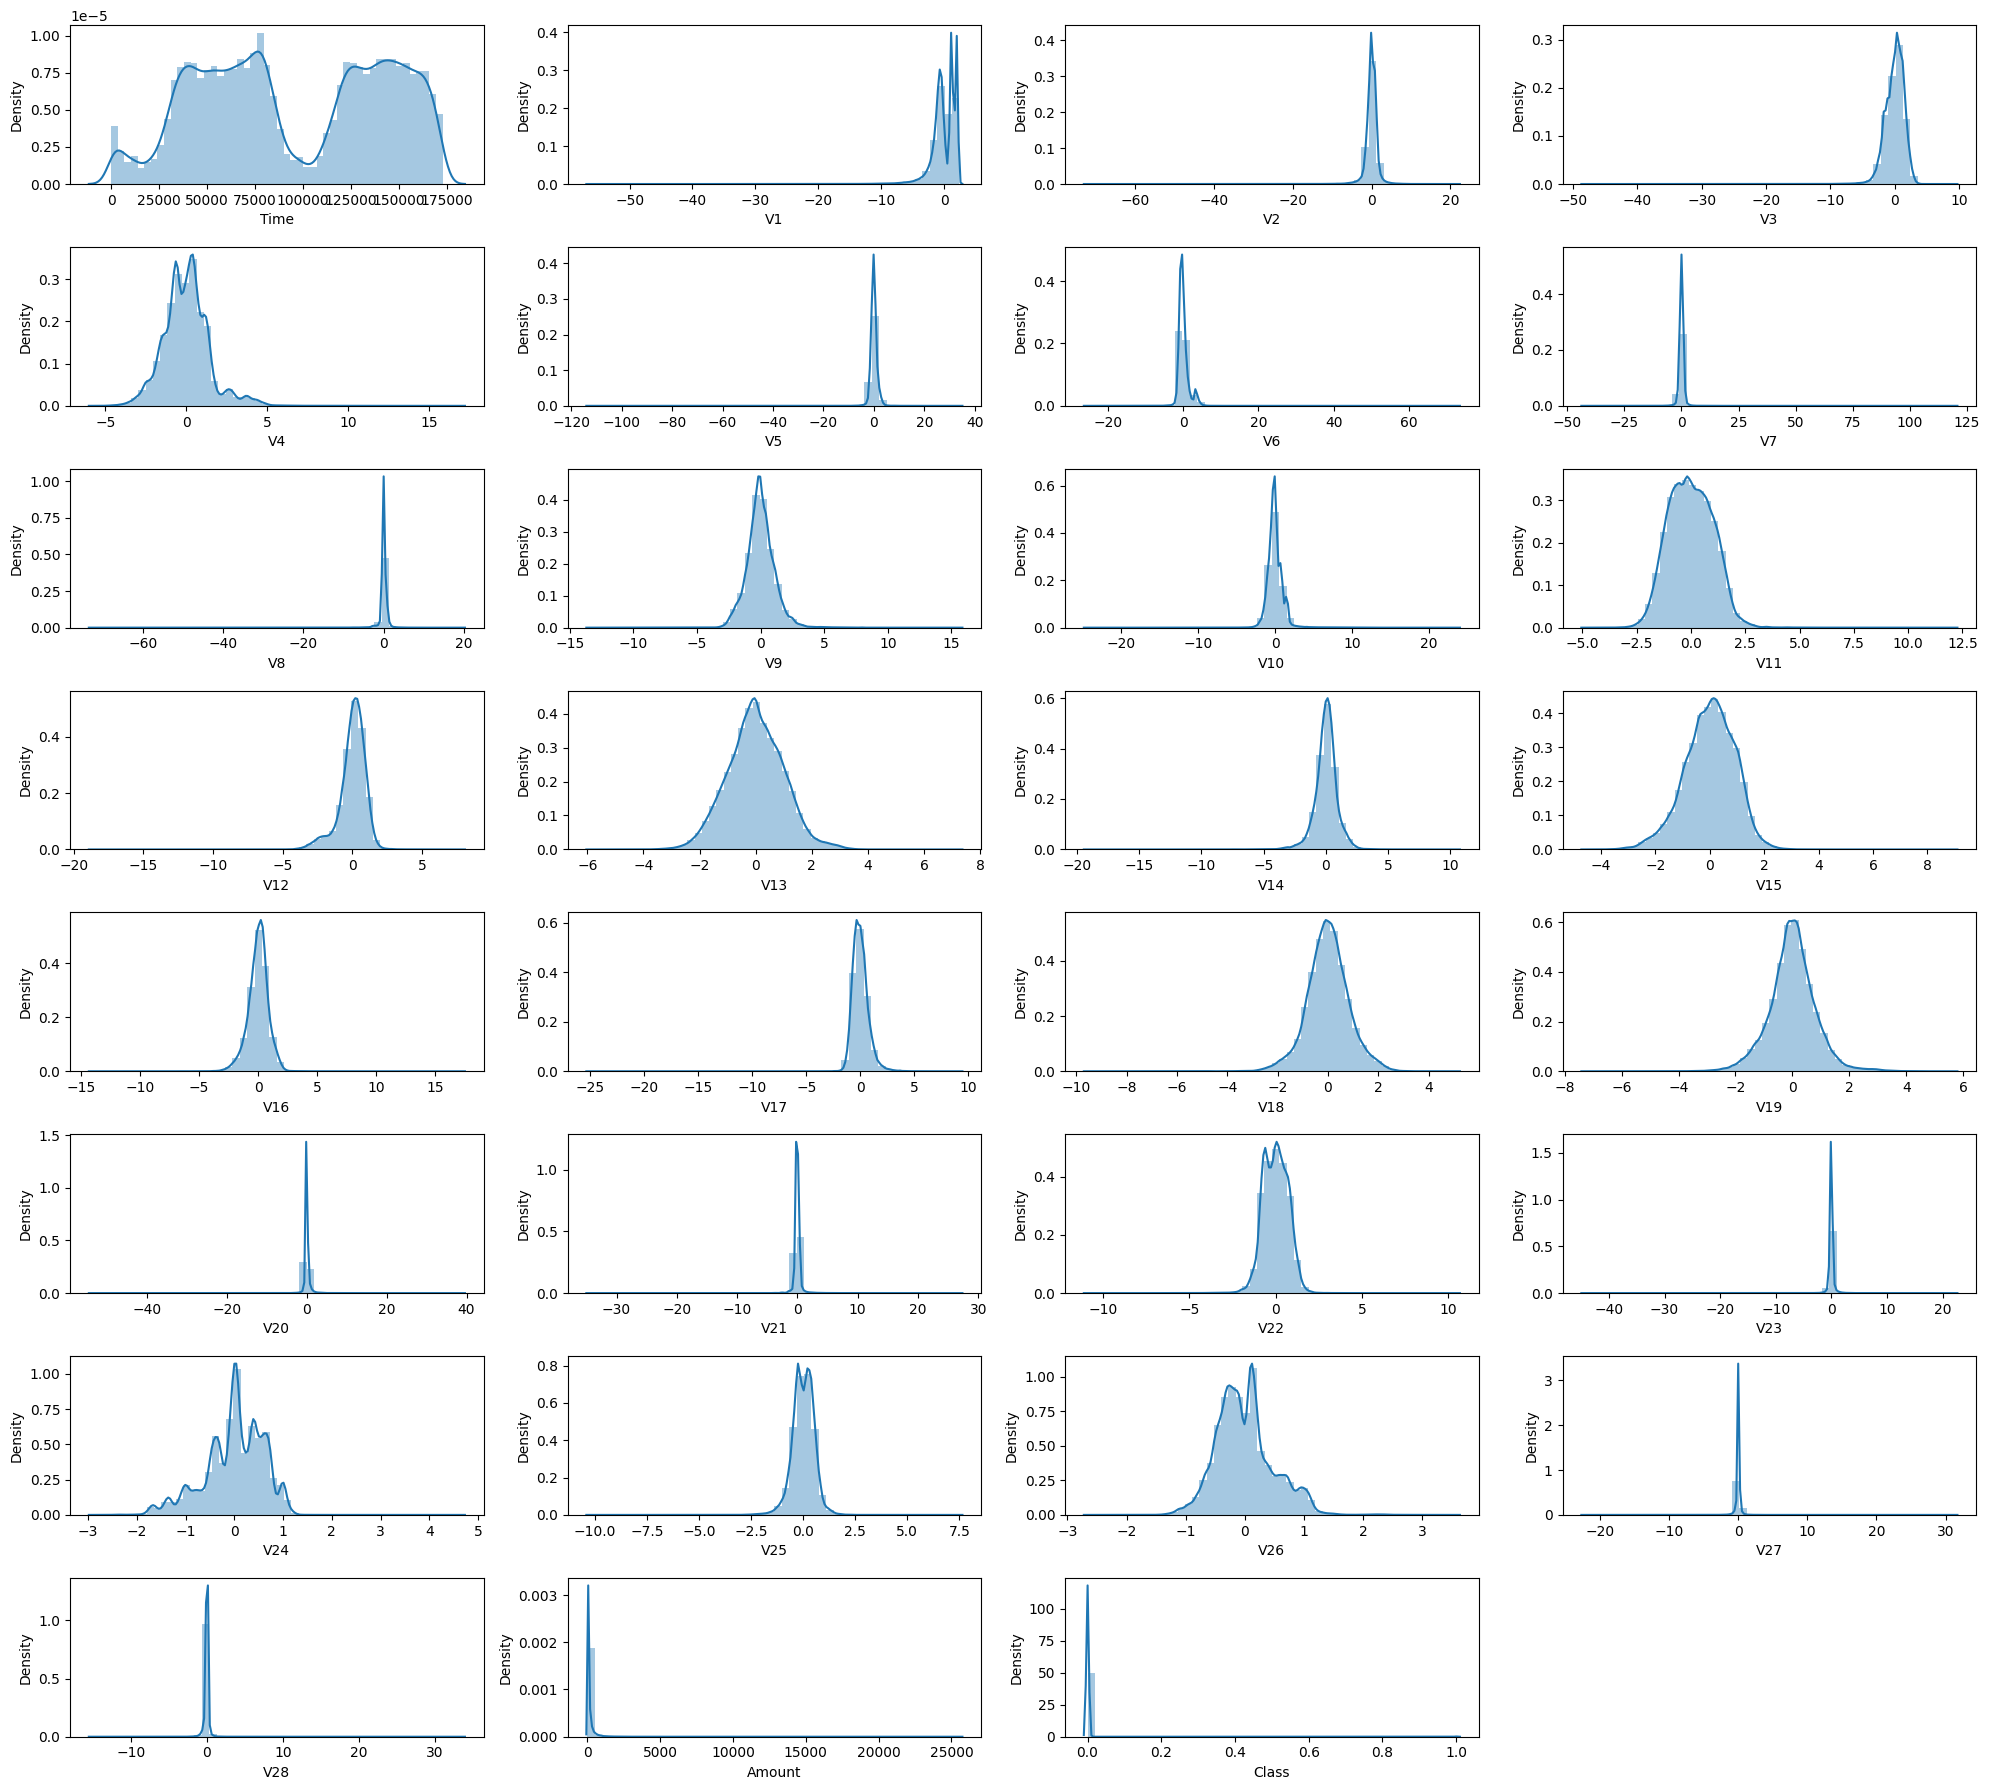

In [5]:
cols = df.columns
plt.figure(figsize=(20, 18))
for i, column in enumerate(df[cols] , 1):
    plt.subplot(8,4,i)
    sns.distplot(df[column])
    plt.tight_layout()

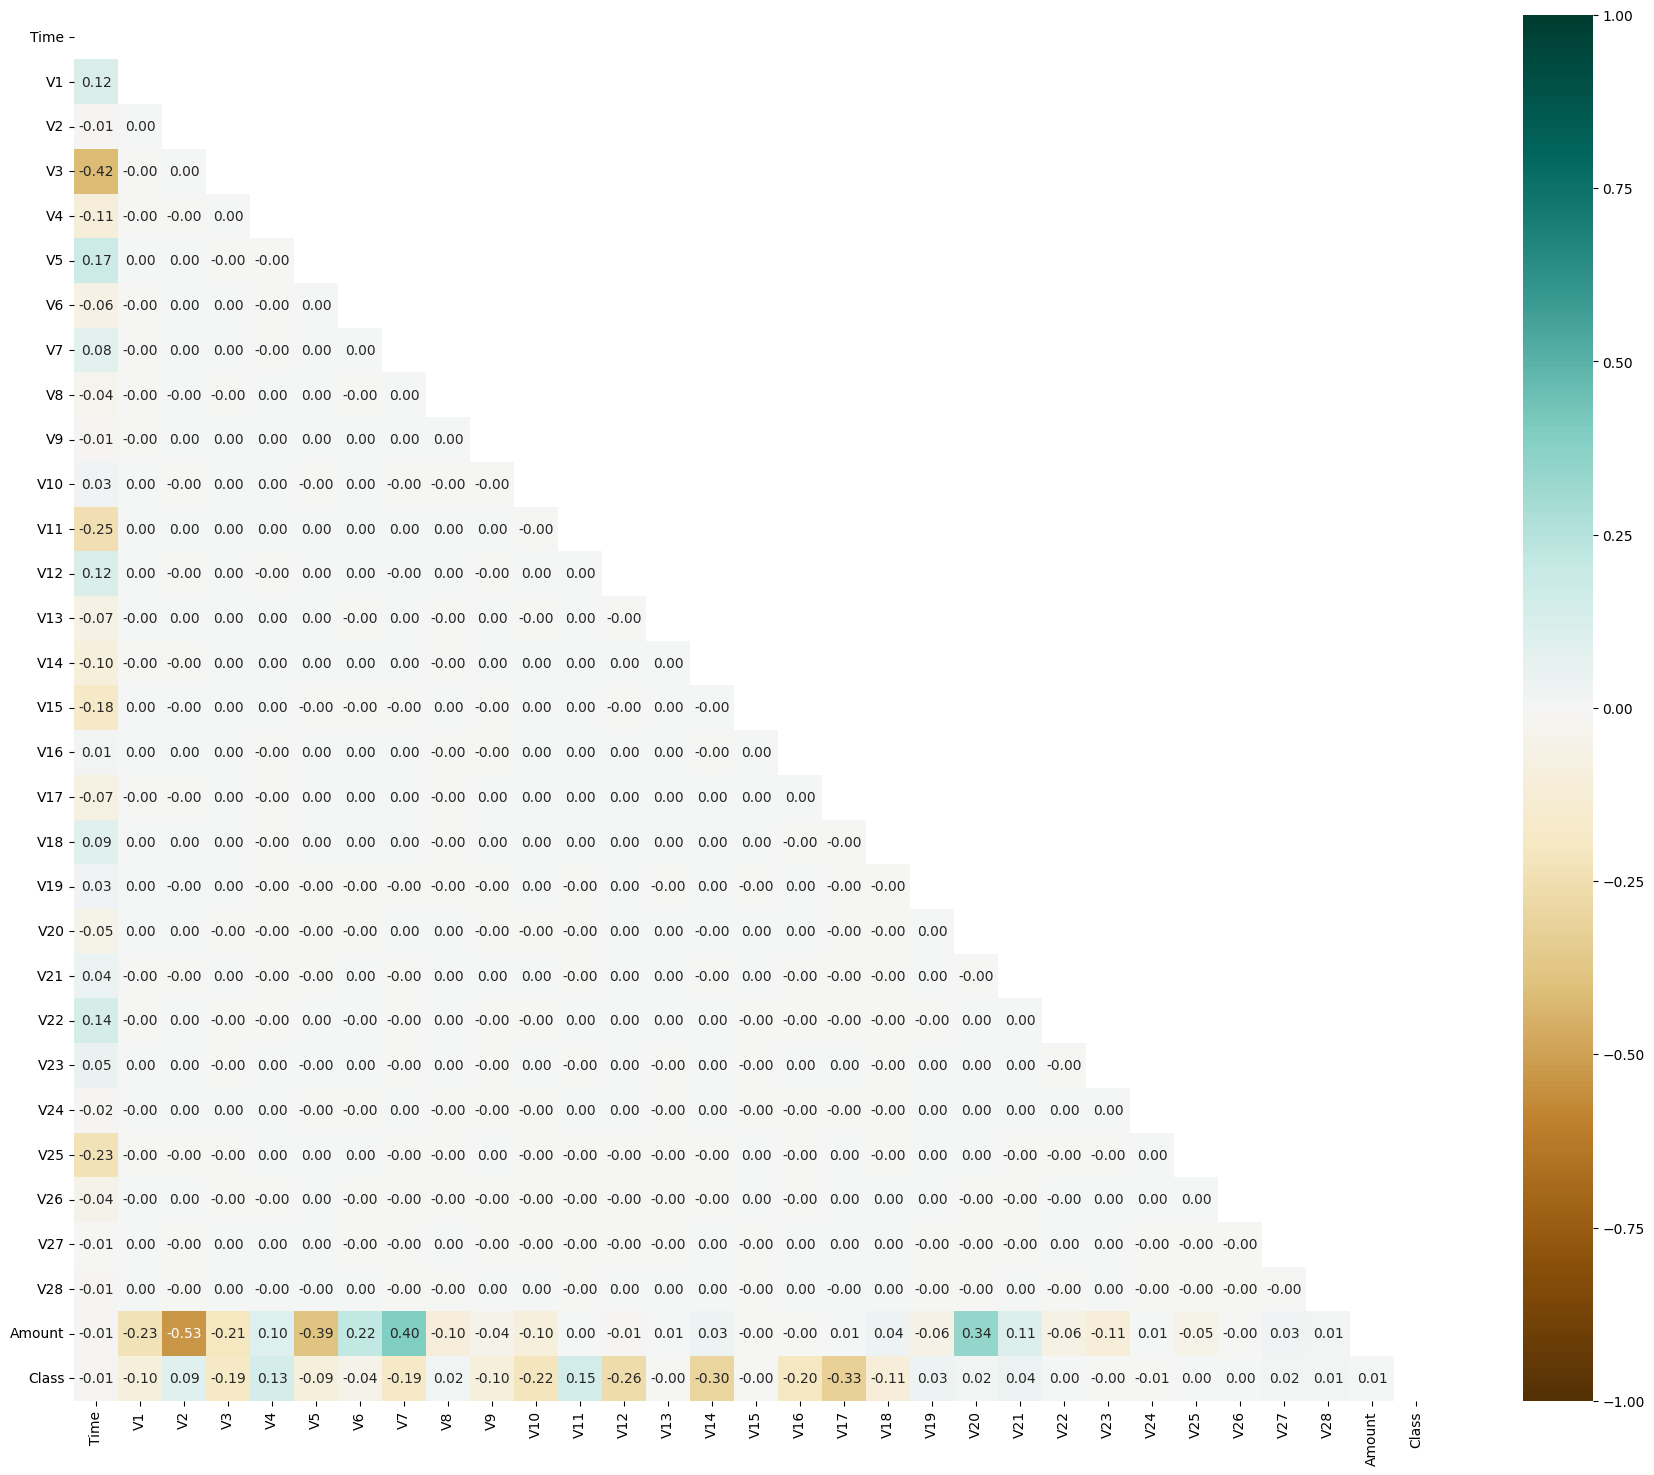

In [47]:
plt.figure(figsize=(22, 18))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt = ".2f",);

Multicoliniarity between V2 and amount

In [3]:
correlated_df = df[['V1', 'V3', 'V4','V7','V9', 'V10', 'V11','V12','V14',
                     'V16','V17','V18', 'Time', 'Amount','Class']]

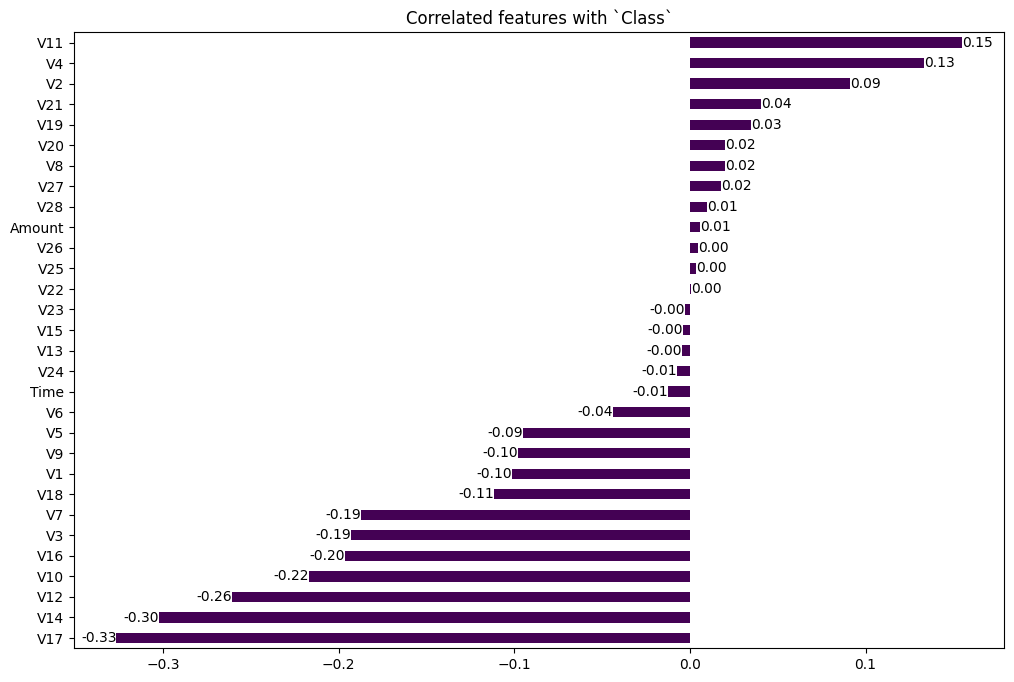

In [49]:
#correlated features with `Class` vs numaric columns
plt.figure(figsize=(12, 8))
ax = df.corr()['Class'][:-1].sort_values().plot(kind='barh', colormap='viridis')
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.title('Correlated features with `Class`');

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [7]:
from deepchecks.tabular import Dataset

ds = Dataset(df,  label= 'Class')

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [51]:
from deepchecks.tabular.suites import data_integrity

integ_suite = data_integrity()
suite_result = integ_suite.run(ds)

suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_BE6RRG6J208JBIDZY5871F4PY">Data Integrity Sui…

### Exploratory Data Analysis

In [4]:
# check dupliactes
df.duplicated().sum()

1081

In [5]:
# dropping them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Data Cleaning
Check Missing Values and Outliers

In [8]:
df.isnull().sum().any()

False

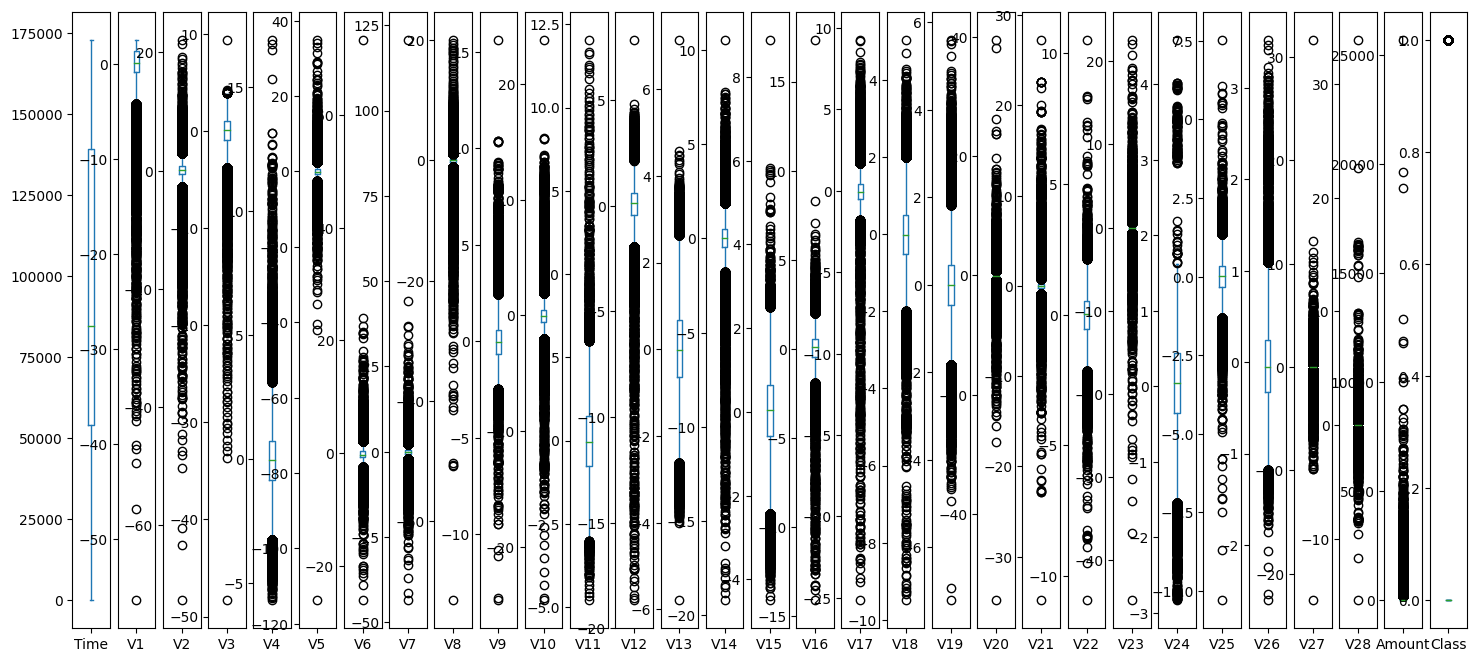

In [14]:
df.plot( kind="box", subplots=True, figsize=(18, 8))
plt.tight_layout();

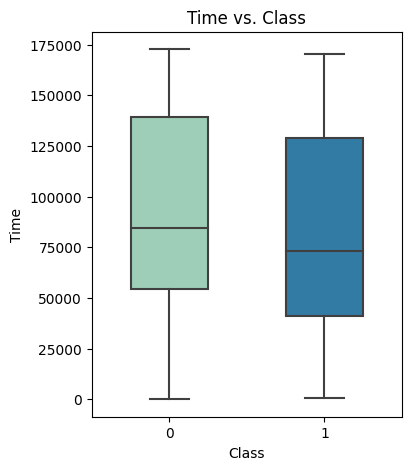

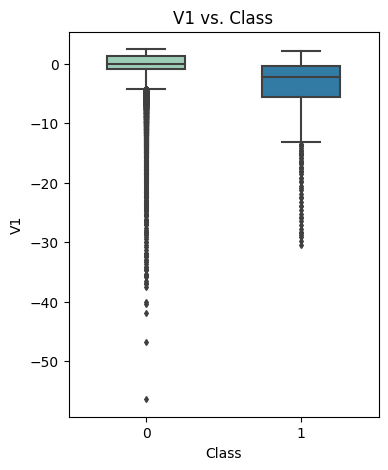

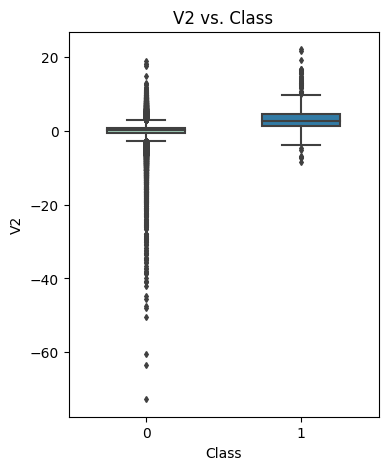

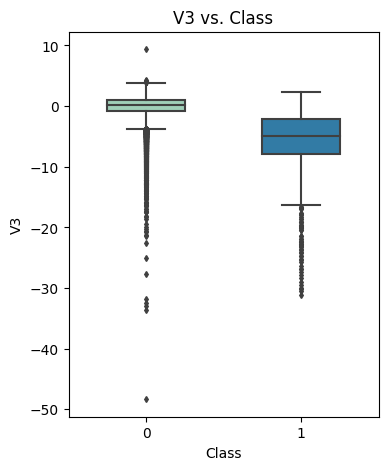

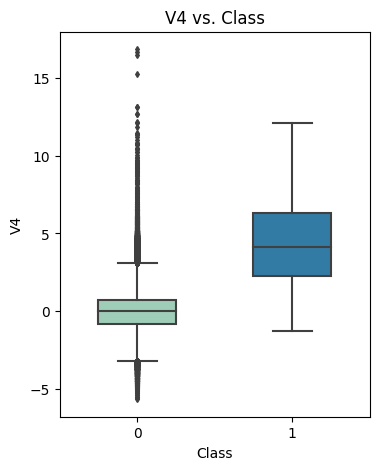

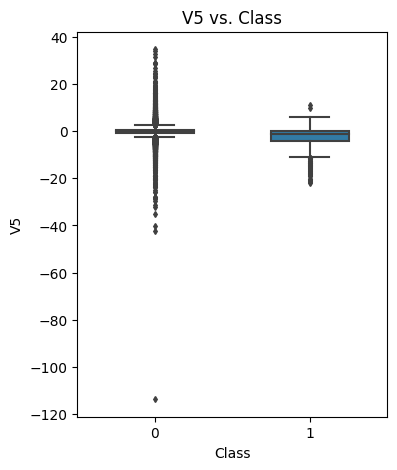

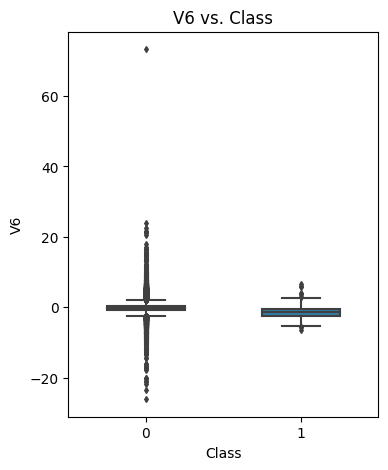

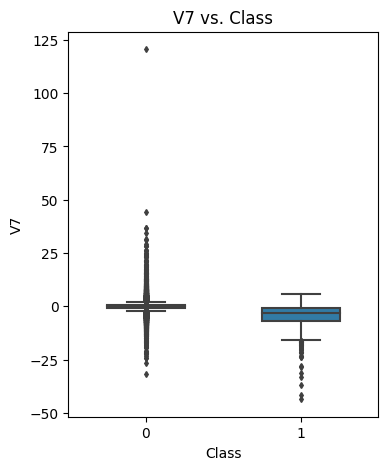

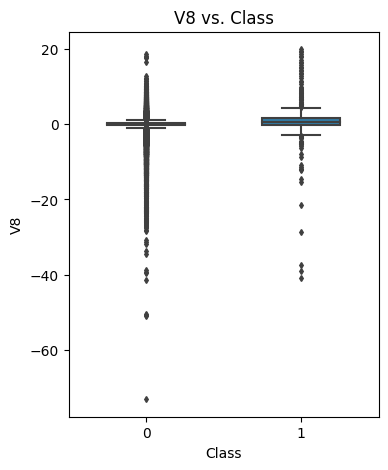

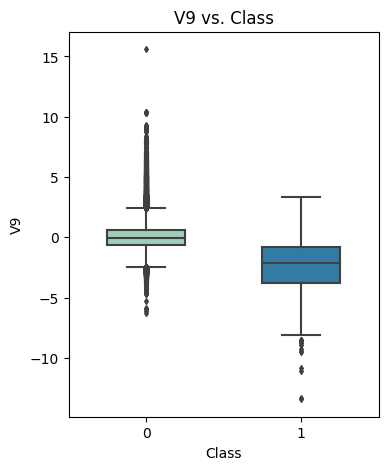

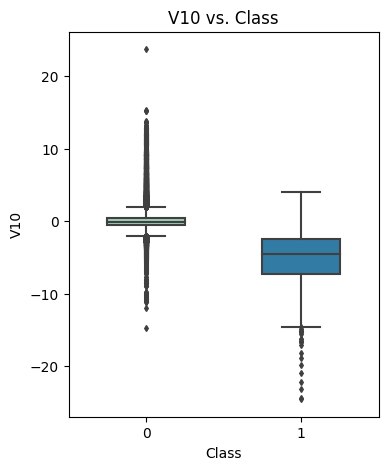

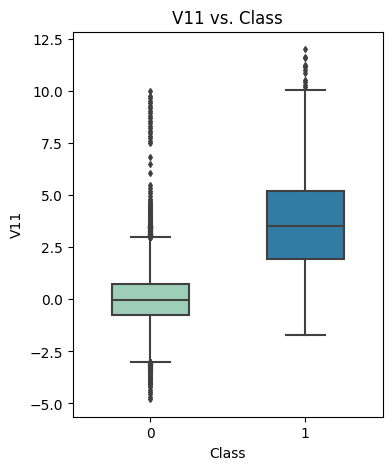

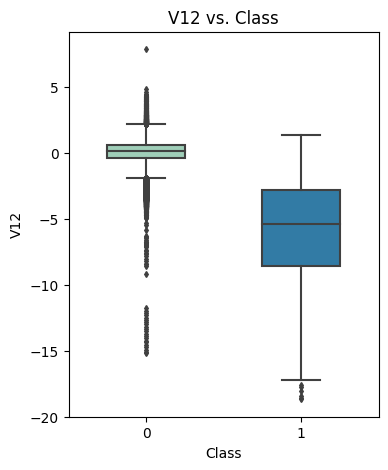

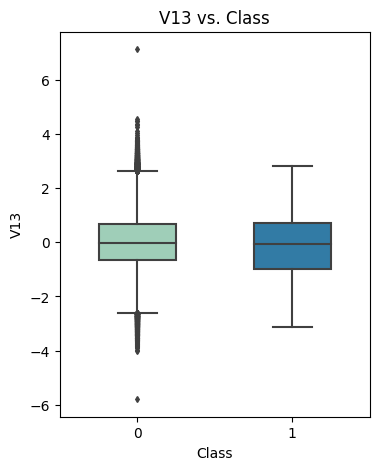

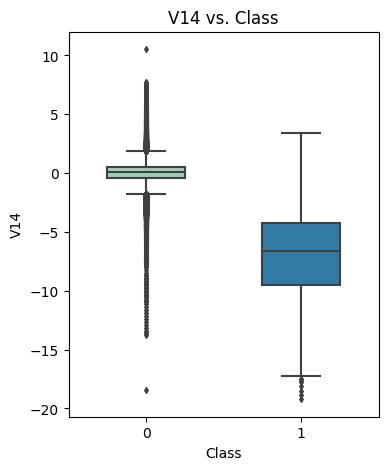

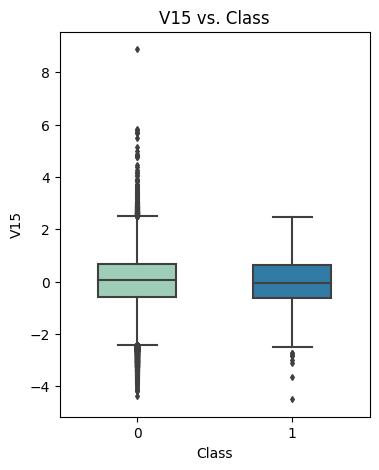

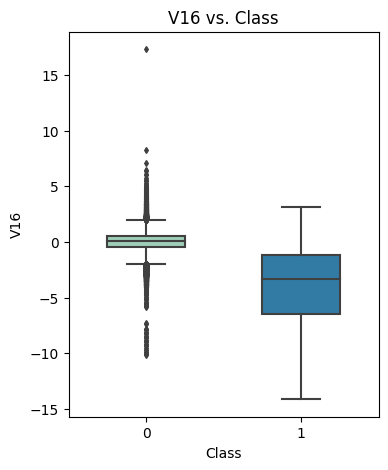

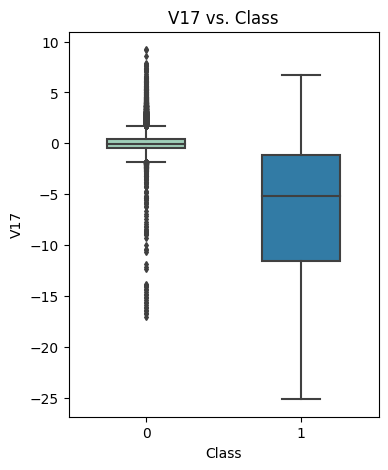

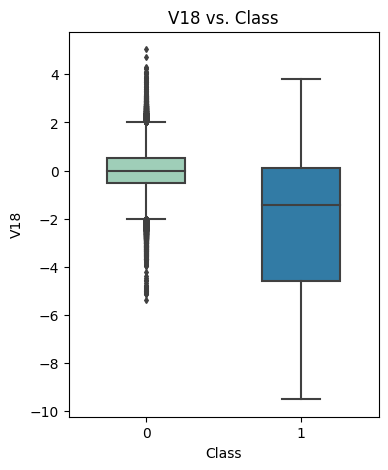

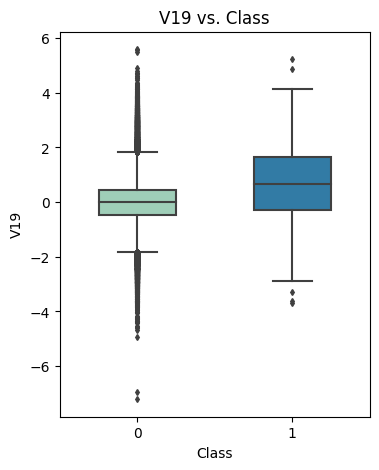

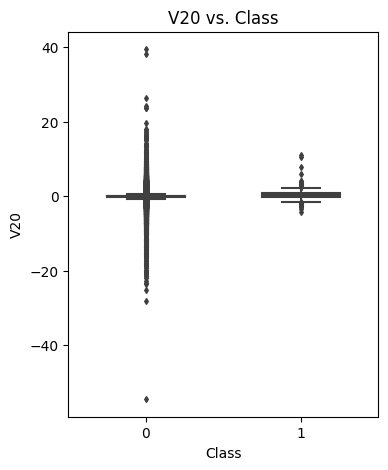

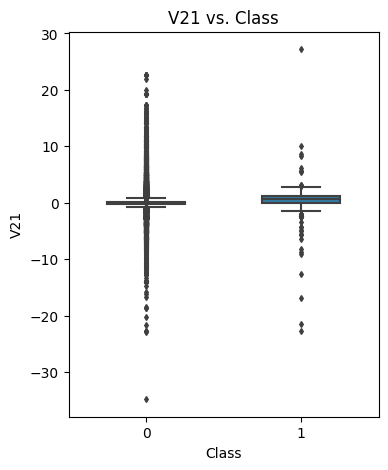

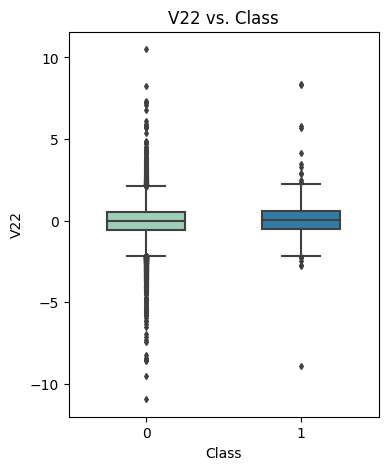

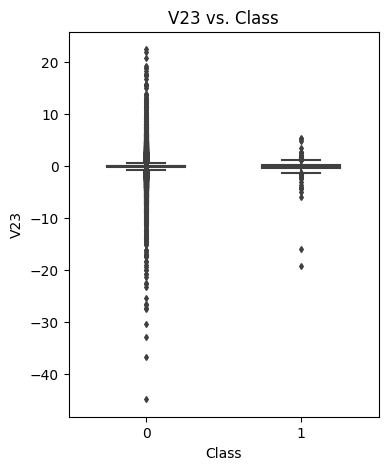

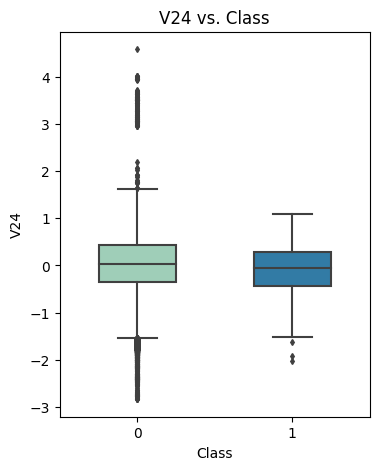

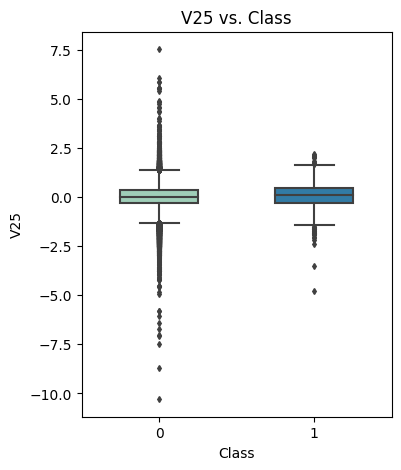

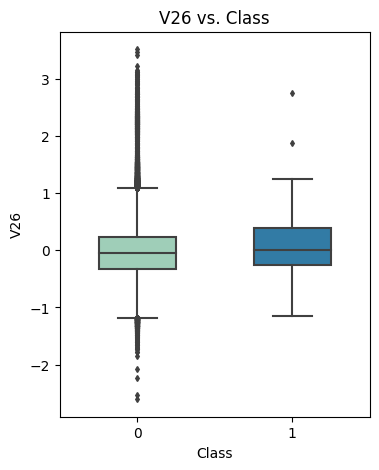

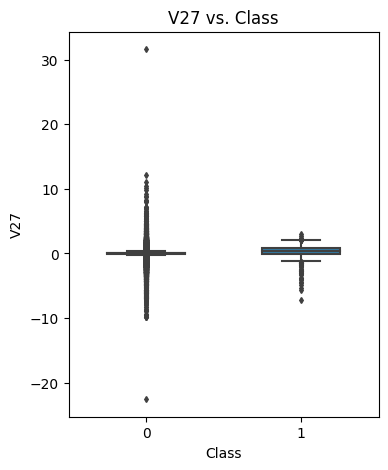

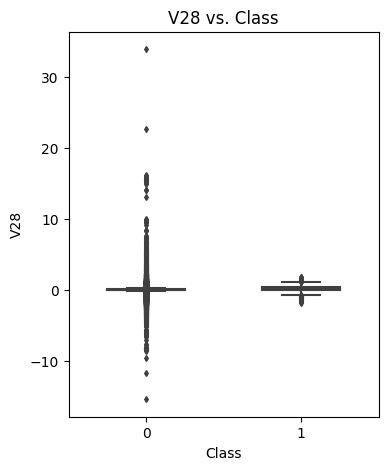

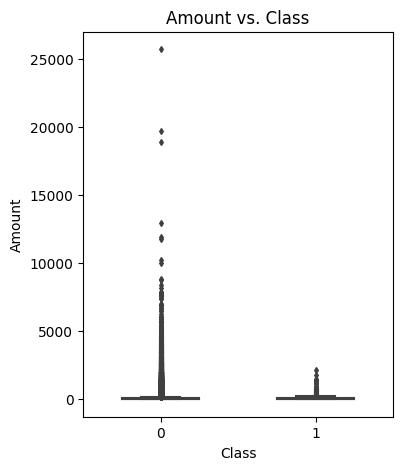

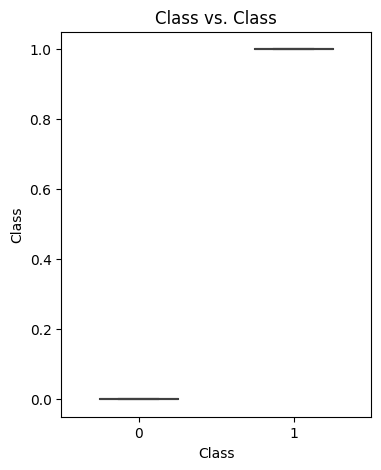

In [55]:
# store numerical columns names except target feature and categorical features
columns = list(df.select_dtypes(include='number').columns)

for column in columns:
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=df, width=0.5, fliersize=3, y=column,
                x='Class', palette = 'YlGnBu')
    plt.title(f'{column} vs. Class')
    plt.show()


Since PCA is applied to the data, we cannot say that these are outliers

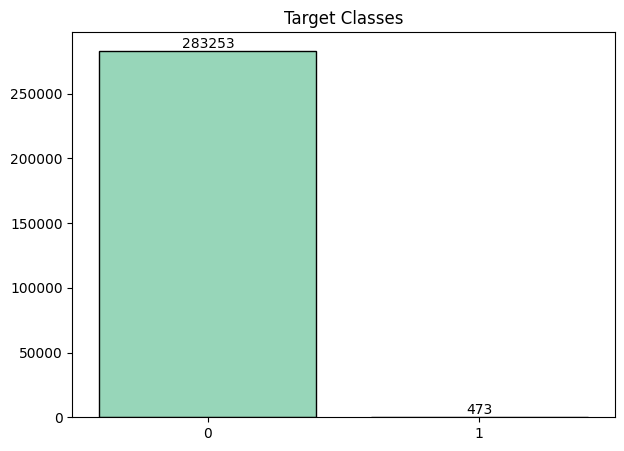

In [56]:
c = df['Class'].value_counts()
# visualizing our target distribution

plt.figure(figsize=(7, 5))
ax= sns.barplot(x=c.index, y=c.values,
            saturation=1, edgecolor='k',
            linewidth=1, palette='YlGnBu')
plt.title(f'Target Classes')
ax.bar_label(ax.containers[0])
plt.show()

From the plot, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1).

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [6]:
# splitting X and y
X = df.drop(columns = ['Class'])
y = df['Class']

In [7]:
X = correlated_df.drop(columns = ['Class'])
y = correlated_df['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [9]:
X_train.shape

(227845, 14)

In [10]:
X_test.shape

(56962, 14)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [11]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_test, label=y_test,cat_features=None)
test_ds = Dataset(X_train, label=y_train,cat_features=None)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [93]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_ds, test_ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_NGCSDWZ8ZRGSXQ1WHUUTR9GNO">Train Test Validat…

#### Scaling

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
ds = Dataset(correlated_df,  label= 'Class')

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques. 

In [14]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    '''
    Description:
    This function gets a model, train and test sets and return
    the confusion matrix and classification report

    INPUT:
    model - fitted model
    X_train - input features for the training set
    y_train - target values for training set
    X_test - input features for the testing set
    y_test - target values for testing set

    RETURN:
    Nothing

    '''
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [15]:
# scorrer for class 1
f1 = make_scorer(f1_score, average=None, labels=[1])

precision = make_scorer(precision_score, average=None, labels=[1])

recall= make_scorer(recall_score, average=None, labels=[1])


scoring = {'f1_1': f1,
           'precision_1': precision,
           'recall_1': recall}

In [16]:
def precision_recall_plot(model,X_test, y_test):
  y_pred_proba = model.predict_proba(X_test)

  plot_precision_recall(y_test, y_pred_proba)
  plt.show();

In [17]:
def carve(model , X_test,y_test):
    y_pred = model.predict(X_test)
    auc_class_0 = roc_auc_score(1 - y_test, 1 - y_pred) # get probs for 0
    auc_class_1 = roc_auc_score(y_test, y_pred) # get probs for 1


    # calculating the ROC curve for class 0
    fpr_class_0, tpr_class_0, _ = roc_curve(1 - y_test, 1 - y_pred)
    auc_class_0 = roc_auc_score(1 - y_test, 1 - y_pred)

    # calculating the ROC curve for class 1
    fpr_class_1, tpr_class_1, _ = roc_curve(y_test, y_pred)
    auc_class_1 = roc_auc_score(y_test, y_pred)

    plt.plot(fpr_class_0, tpr_class_0, label='Class 0 (AUC = {:.2f})'.format(auc_class_0))
    plt.plot(fpr_class_1, tpr_class_1, label='Class 1 (AUC = {:.2f})'.format(auc_class_1))
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

### Logistic Regression 

- The steps you are going to cover for this algorithm are as follows: 

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***ii. Model Training***

In [19]:
logistic_model = LogisticRegression(max_iter=1000, random_state=101)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [20]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Train_Set
[[227417     34]
 [   161    233]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.87      0.59      0.70       394

    accuracy                           1.00    227845
   macro avg       0.94      0.80      0.85    227845
weighted avg       1.00      1.00      1.00    227845


Test_Set
[[56858     6]
 [   39    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.60      0.72        98

    accuracy                           1.00     56962
   macro avg       0.95      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962



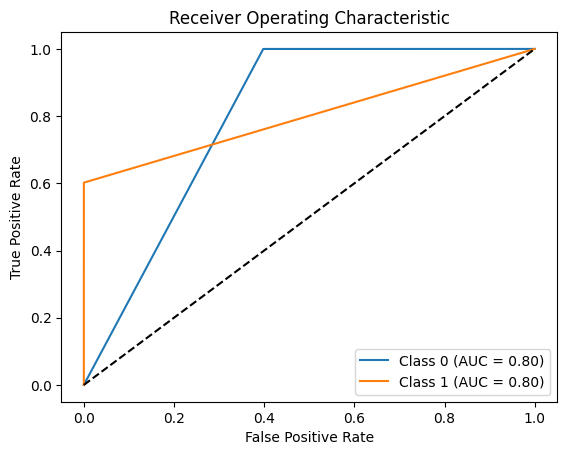

In [21]:
carve(logistic_model , X_test,y_test)

***iii. Prediction and Model Evaluating  and Tuning***

### Logistic Regression with Unbalanced Data Techniques

In [19]:
# w0 =  283726/(2*283253) 
# w1= 283726/(2*473) 
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5008661206149896, 1: 289.14340101522845}

In [24]:
param_grid = {
    'C': [0.01, 0.1, 0.5, 1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    "class_weight": [{0:50, 1:90}, {0:50, 1:100},{0:50, 1:110},{0:50, 1:120},{0:50, 1:130}]
}

In [25]:
grid = HalvingGridSearchCV(logistic_model, 
                                 param_grid, 
                                 scoring='recall', 
                                 cv=10, 
                                 n_jobs=-1,
                                 random_state=101).fit(X_train, y_train)


print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.736
Test set score: 0.806
Best parameters: {'C': 0.5, 'class_weight': {0: 50, 1: 130}, 'penalty': 'l1', 'solver': 'liblinear'}


In [20]:
logistic_model = LogisticRegression(max_iter=1000, random_state=101, C=0.5, solver='liblinear', penalty='l1', class_weight={0: 50, 1: 130})
logistic_model.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight={0: 50, 1: 130}, max_iter=1000,
                   penalty='l1', random_state=101, solver='liblinear')

In [29]:
eval_metric(logistic_model, X_train, y_train, X_test, y_test)
#Overfitting (recall)

Train_Set
[[227381     70]
 [   104    290]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.81      0.74      0.77       394

    accuracy                           1.00    227845
   macro avg       0.90      0.87      0.88    227845
weighted avg       1.00      1.00      1.00    227845


Test_Set
[[56848    16]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.81      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
scores = cross_validate(logistic_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.759092
train_f1_1           0.767024
test_precision_1     0.800070
train_precision_1    0.803772
test_recall_1        0.725449
train_recall_1       0.733501
dtype: float64

No overfitting but the scores for class 1 is not very high

***iv. Plot Precision and Recall Curve***


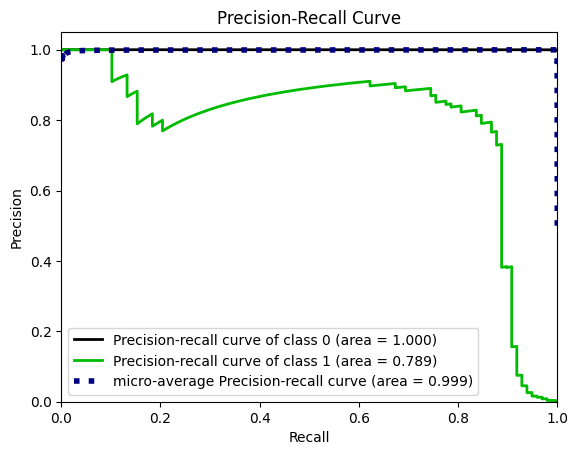

In [31]:
precision_recall_plot(logistic_model,X_test, y_test)

In [32]:
y_pred = logistic_model.predict(X_test)

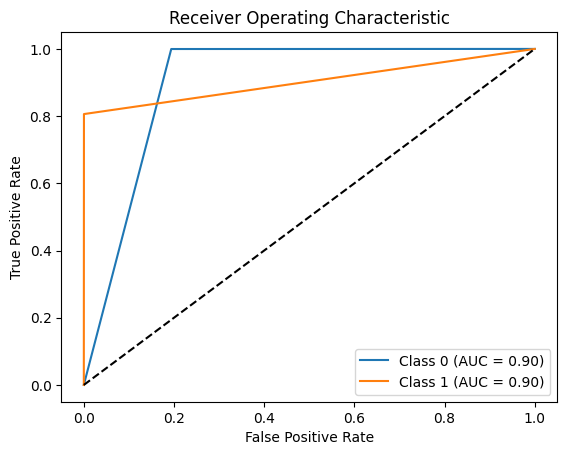

In [33]:
carve(logistic_model , X_test,y_test)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

Class 1 did not pass the check, AUC score is lowers than 0.5

In [22]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, logistic_model)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_HVJ2S7OAU8NR4TNMGIA082RAG">Model Evaluation S…

In [24]:
from deepchecks.tabular.checks import RocReport

check = RocReport()
check.add_condition_auc_greater_than(0.4).run(ds, logistic_model) # custom threshold

In [25]:
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3) # difference set to 0.3
result = check.run(train_ds, test_ds, logistic_model)
result.show()

Due to the highly imbalanced nature of classes the results can be improved using another algorithm

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [39]:
# Vanilla model
rf = RandomForestClassifier(random_state=101, max_depth=6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=101)

In [40]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Train_Set
[[227438     13]
 [    83    311]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.79      0.87       394

    accuracy                           1.00    227845
   macro avg       0.98      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845


Test_Set
[[56861     3]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



Great results on test set

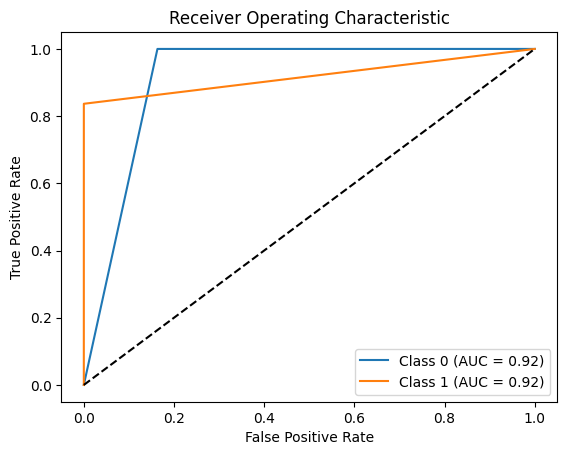

In [41]:
carve(rf , X_test,y_test)

***ii. Prediction and Model Evaluating and Tuning***

In [42]:
param_grid = {
    'max_depth': [4,5,6],
    'criterion' :['gini', 'entropy'],
    "min_samples_split": [2,3,4,5],
   "class_weight": [{0:50, 1:90}, {0:50, 1:100},{0:50, 1:110},"balanced_subsample","balanced"]

}

grid = HalvingGridSearchCV(rf, 
                            param_grid, 
                            scoring='recall', 
                            cv=10, 
                            n_jobs=-1,
                            random_state=101).fit(X_train, y_train)



print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.767
Test set score: 0.837
Best parameters: {'class_weight': {0: 50, 1: 100}, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}


In [26]:
rf = RandomForestClassifier(random_state=101, max_depth=5, criterion='entropy',
                             class_weight={0: 50, 1: 100}, min_samples_split=5)
rf.fit(X_train, y_train)
#better result

RandomForestClassifier(class_weight={0: 50, 1: 100}, criterion='entropy',
                       max_depth=5, min_samples_split=5, random_state=101)

In [50]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Train_Set
[[227436     15]
 [    73    321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.81      0.88       394

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845


Test_Set
[[56861     3]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



The scores have improved a little

In [51]:
scores = cross_validate(rf,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.822935
train_f1_1           0.876365
test_precision_1     0.908926
train_precision_1    0.949416
test_recall_1        0.756026
train_recall_1       0.813877
dtype: float64

***iii. Plot Precision and Recall Curve***


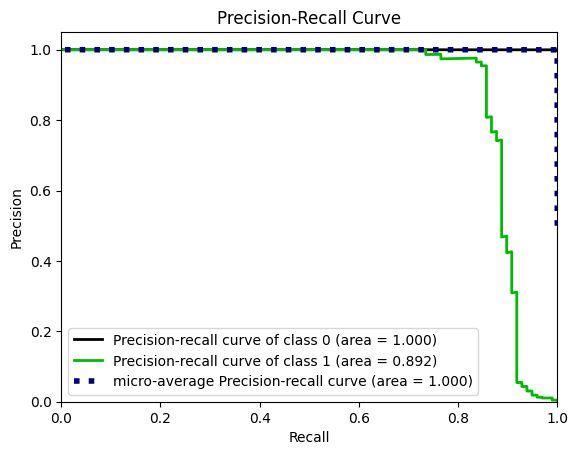

In [52]:
precision_recall_plot(rf,X_test, y_test)

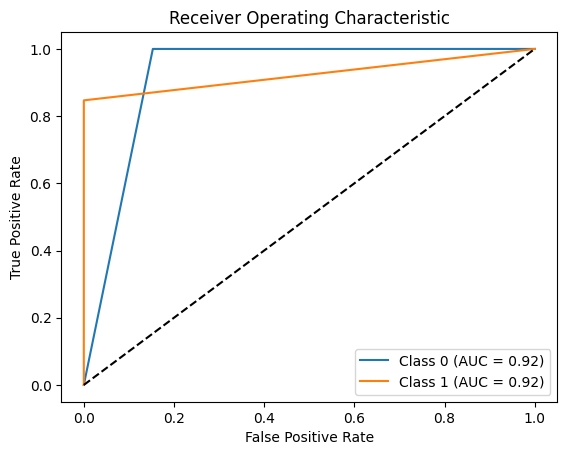

In [53]:
carve(rf , X_test,y_test)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

Passed all tests!

In [27]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, rf)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_Y0FTTJSQ8FZOUFL2COT58CWMP">Model Evaluation S…

In [54]:
check = RocReport()
check.add_condition_auc_greater_than(0.6).run(ds, rf) # custom threshold

In [56]:
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3) # setting the diffrence to 0.3
result = check.run(train_ds, test_ds, rf)
result.show()

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [57]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Train_Set
[[227451      0]
 [     0    394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845


Test_Set
[[56861     3]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



The models suffers from overfitting

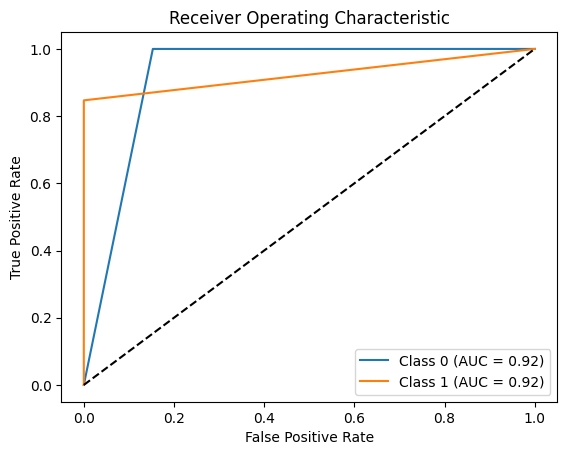

In [59]:
carve(xgb_model, X_test,y_test)

***ii. Prediction and Model Evaluating and Tuning***

In [68]:
param_grid = {
    'subsample' :[0.3, 0.5],
    'eta': [0.01, 0.05, 0.1],
    'gamma': [0,1,5],
    'lambda': [0, 1, 2] # L2 regularization
}

grid = HalvingGridSearchCV(xgb_model, 
                            param_grid, 
                            scoring='recall', 
                            cv=3, 
                            n_jobs=-1,
                            random_state=101).fit(X_train, y_train)

print("Best cross-validation accuracy: {:.3f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(X_test, y_test))) 
print("Best parameters: {}".format(grid.best_params_))

[20:22:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dpeth" } are not used.

Best cross-validation accuracy: 0.784
Test set score: 0.857
Best parameters: {'eta': 0.1, 'gamma': 0, 'lambda': 1, 'subsample': 0.5}


In [29]:
xgb_model = XGBClassifier(eta= 0.1, subsample=0.5, gamma=0, reg_lambda=1 )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [72]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)
#smillar of RF

Train_Set
[[227449      2]
 [    60    334]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.85      0.92       394

    accuracy                           1.00    227845
   macro avg       1.00      0.92      0.96    227845
weighted avg       1.00      1.00      1.00    227845


Test_Set
[[56859     5]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.86      0.90        98

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [73]:
scores = cross_validate(xgb_model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv = 10,
                        n_jobs=-1,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_1            0.846907
train_f1_1           0.917267
test_precision_1     0.931446
train_precision_1    0.993105
test_recall_1        0.781474
train_recall_1       0.852226
dtype: float64

Higher scores than Random Forest

***iii. Plot Precision and Recall Curve***


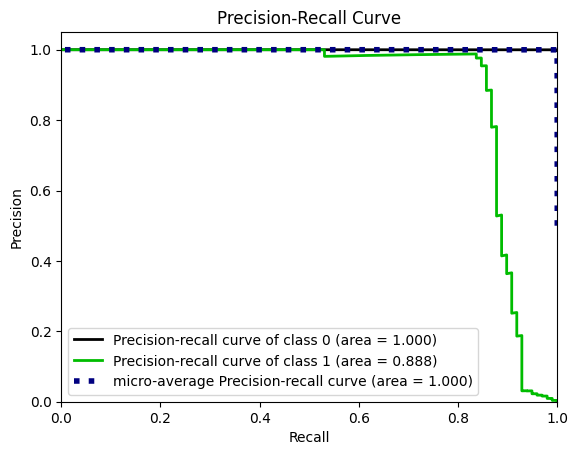

In [74]:
precision_recall_plot(xgb_model,X_test, y_test)

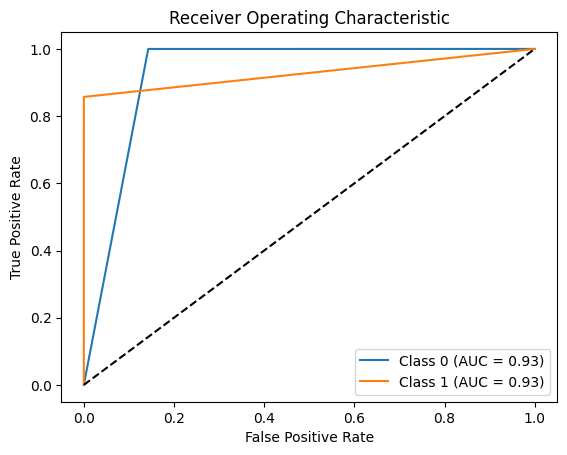

In [75]:
carve(xgb_model, X_test,y_test)

AUC score is 93 for both classes

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

 Passed test!

In [30]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_model)
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_MVC9DNWAT9U8JATF0V6PKUWJV">Model Evaluation S…

In [31]:
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, xgb_model)
result.show()

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.utils import class_weight
import warnings
import os

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
sns.set_style('whitegrid')

In [14]:
SEED = 101
import os
import random

def set_seed():
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

## Data splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.1, 
                                                  stratify = y_train, random_state = 101)

In [16]:
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

***ii. Define Model***

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [17]:
set_seed()

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(34, activation="relu"))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))


***iii. Compile Model***

In [25]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

***iv. Fit Model***

In [26]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience= 8)

***v. Prediction and Model Evaluating***

In [27]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_val,y_val),
           batch_size = 128, epochs = 100, class_weight={0: 50, 1:90}, callbacks=[early_stop])

Epoch 1/100
1596/1596 [==============================] - 6s 3ms/step - loss: 0.8211 - recall: 0.7265 - val_loss: 0.0035 - val_recall: 0.8421
Epoch 2/100
1596/1596 [==============================] - 4s 3ms/step - loss: 0.2548 - recall: 0.8000 - val_loss: 0.0028 - val_recall: 0.8421
Epoch 3/100
1596/1596 [==============================] - 4s 3ms/step - loss: 0.2318 - recall: 0.8029 - val_loss: 0.0030 - val_recall: 0.8421
Epoch 4/100
1596/1596 [==============================] - 4s 3ms/step - loss: 0.2242 - recall: 0.8029 - val_loss: 0.0027 - val_recall: 0.8421
Epoch 5/100
1596/1596 [==============================] - 4s 2ms/step - loss: 0.2130 - recall: 0.7971 - val_loss: 0.0027 - val_recall: 0.8421
Epoch 6/100
1596/1596 [==============================] - 5s 3ms/step - loss: 0.2016 - recall: 0.7971 - val_loss: 0.0022 - val_recall: 0.8421
Epoch 7/100
1596/1596 [==============================] - 6s 4ms/step - loss: 0.1899 - recall: 0.8088 - val_loss: 0.0026 - val_recall: 0.8421
Epoch 8/100
1

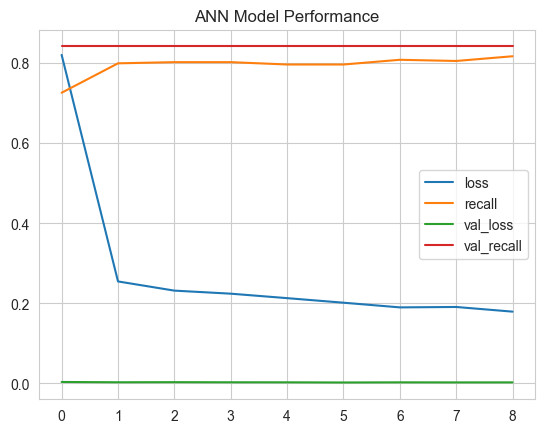

In [28]:
res = pd.DataFrame(history.history)
res.plot()
plt.title('ANN Model Performance');

In [29]:
print("-----------------TRAIN SET------------------")
y_predT = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_predT))
print(classification_report(y_train, y_predT))

print("-----------------TEST SET------------------")
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


-----------------TRAIN SET------------------
6384/6384 [==============================] - 11s 2ms/step
[[203896     46]
 [    57    283]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203942
           1       0.86      0.83      0.85       340

    accuracy                           1.00    204282
   macro avg       0.93      0.92      0.92    204282
weighted avg       1.00      1.00      1.00    204282

-----------------TEST SET------------------
1774/1774 [==============================] - 3s 2ms/step
[[56635    16]
 [   23    72]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.82      0.76      0.79        95

    accuracy                           1.00     56746
   macro avg       0.91      0.88      0.89     56746
weighted avg       1.00      1.00      1.00     56746



***vi. Plot Precision and Recall Curve***

In [ ]:
carve(model, X_test,y_test)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [18]:
def create_model():
        """ create ann model with specific archticture

        Returns:
        kears model
        
        """
        set_seed()

        model = Sequential()
        model.add(Dense(64, activation="relu", input_dim=X_train.shape[1]))
        model.add(Dense(34, activation="relu"))
        model.add(Dense(18, activation="relu"))
        model.add(Dropout(0.1))
        model.add(Dense(1, activation="sigmoid"))
    
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])
    
        return model

In [19]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(build_fn=create_model, batch_size=128, epochs=10,
                        class_weight={0: 50, 1:90},
                        verbose=0, optimizer="adam", loss='binary_crossentropy')

model.fit(X_train,y_train)

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x000001E539637EB0>
	warm_start=False
	random_state=None
	optimizer=adam
	loss=binary_crossentropy
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight={0: 50, 1: 90}
)

In [20]:
scores = cross_validate(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring=['balanced_accuracy', 'precision', 'recall', 'f1'],
    cv=10,
    n_jobs=-1
)

cross_val = pd.DataFrame(scores, index=range(1, 11)).iloc[:, 2:]

cross_val

,test_balanced_accuracy,test_precision,test_recall,test_f1
1,0.928449,0.857143,0.857143,0.857143
2,0.856923,0.735294,0.714286,0.724638
3,0.899853,0.823529,0.800000,0.811594
4,0.914139,0.828571,0.828571,0.828571
5,0.914115,0.805556,0.828571,0.816901
6,0.916496,0.810811,0.833333,0.821918
7,0.888767,0.848485,0.777778,0.811594
8,0.916618,0.937500,0.833333,0.882353
9,0.847149,0.892857,0.694444,0.781250
10,0.861013,0.866667,0.722222,0.787879


In [22]:
df_scores = pd.DataFrame(
    {'mean': cross_val.mean().values, 'std': cross_val.std().values},
    index=['balanced_accuracy', 'precision', 'recall', 'f1'],
)

df_scores

,mean,std
balanced_accuracy,0.894352,0.029312
precision,0.840641,0.054545
recall,0.788968,0.058628
f1,0.812384,0.042873


In [21]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model)
suite_result.show()

deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead
deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 124 seconds, but timeout was configured to 120 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_UH87QXHHKYH8CGD1NQLWOHPKD">Model Evaluation S…

In [93]:
check = TrainTestPerformance().add_condition_train_test_relative_degradation_less_than(0.3)
result = check.run(train_ds, test_ds, model)
result.show()

7121/7121 [==============================] - 10s 1ms/step


passed the test with diffrence set at 0.3

## Models comparison

In [96]:
# storing results
y_pred1 = logistic_model.predict(X_test) 
y_pred_proba1= logistic_model.predict(X_test)
logistic_model_AP = average_precision_score(y_test, y_pred_proba1)
logistic_model_recall = recall_score(y_test, y_pred1)
logistic_model_f1 = f1_score(y_test,y_pred1)
logistic_model_precision = precision_score(y_test, y_pred1)

y_pred2 = rf.predict(X_test) 
y_pred_proba2= rf.predict(X_test)
rf_model_AP = average_precision_score(y_test, y_pred_proba2)
rf_model_recall = recall_score(y_test, y_pred2)
rf_model_f1 = f1_score(y_test,y_pred2)
rf_model_precision = precision_score(y_test, y_pred2)

y_pred3 = xgb_model.predict(X_test)
y_pred_proba3= xgb_model.predict(X_test)
xgb_model_AP = average_precision_score(y_test, y_pred_proba3)
xgb_model_recall = recall_score(y_test, y_pred3)
xgb_model_f1 = f1_score(y_test,y_pred3)
xgb_model_precision = precision_score(y_test, y_pred3)

y_pred4 = model.predict(X_test) > 0.5
y_pred_proba4= model.predict(X_test)
ann_AP = average_precision_score(y_test, y_pred_proba4)
ann_recall = recall_score(y_test, y_pred4)
ann_f1 = f1_score(y_test,y_pred4)
ann_precision = precision_score(y_test, y_pred4)

1781/1781 [==============================] - 3s 1ms/step


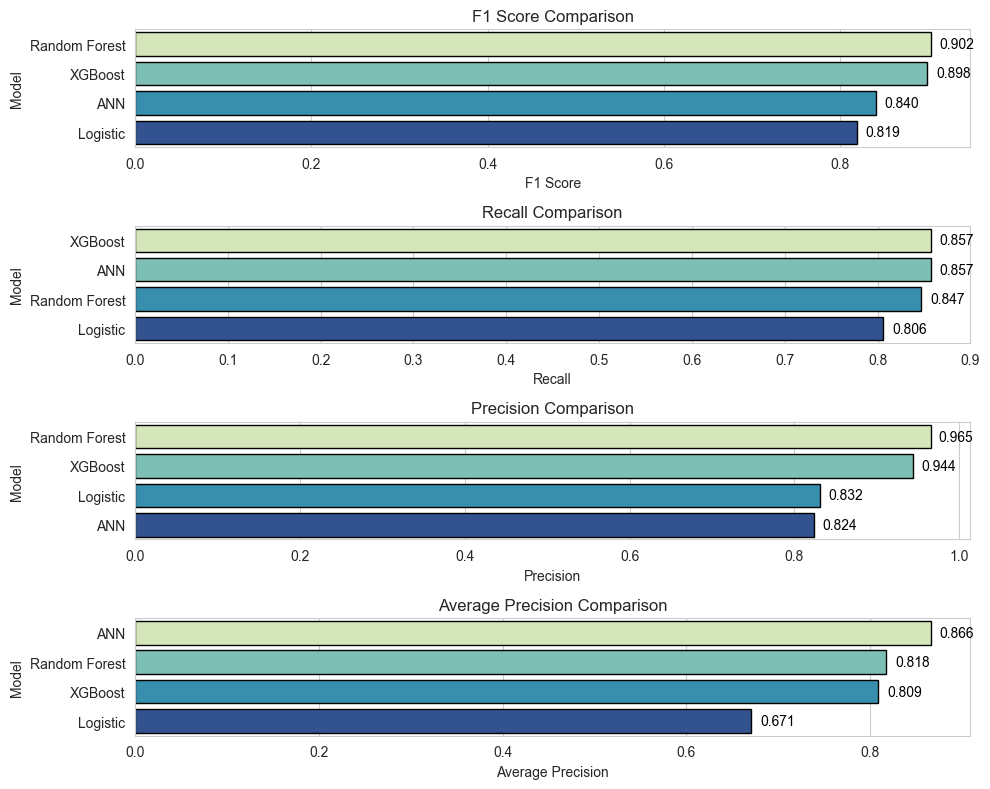

In [97]:
compare = pd.DataFrame({
    "Model": ["Logistic", "Random Forest", "XGBoost", "ANN"],
    "F1": [logistic_model_f1, rf_model_f1,  xgb_model_f1, ann_f1],
    "Recall": [logistic_model_recall, rf_model_recall,  xgb_model_recall, ann_recall],
    "Precision": [logistic_model_precision, rf_model_precision,  xgb_model_precision, ann_precision],
    "Average_Precision": [logistic_model_AP, rf_model_AP, xgb_model_AP,ann_AP]
})

plt.figure(figsize=(10, 8))


compare = compare.sort_values(by="F1", ascending=False)

plt.subplot(411)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="YlGnBu", 
                 edgecolor='k',linewidth=1,)
for i, v in enumerate(compare["F1"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")
plt.title("F1 Score Comparison")
plt.xlabel("F1 Score")
plt.ylabel("Model")

compare = compare.sort_values(by="Recall", ascending=False)

plt.subplot(412)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="YlGnBu",
                 edgecolor='k',linewidth=1)
for i, v in enumerate(compare["Recall"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")
plt.title("Recall Comparison")
plt.xlabel("Recall")
plt.ylabel("Model")

compare = compare.sort_values(by="Precision", ascending=False)


plt.subplot(413)
ax = sns.barplot(x="Precision", y="Model", data=compare, palette="YlGnBu",
                 edgecolor='k',linewidth=1)
for i, v in enumerate(compare["Precision"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")
plt.title("Precision Comparison")
plt.xlabel("Precision")
plt.ylabel("Model")

compare = compare.sort_values(by="Average_Precision", ascending=False)

plt.subplot(414)
ax = sns.barplot(x="Average_Precision", y="Model", data=compare, palette="YlGnBu",
                 edgecolor='k',linewidth=1)
for i, v in enumerate(compare["Average_Precision"]):
    ax.text(v + 0.01, i, f"{v:.3f}", color="black", va="center")
plt.title("Average Precision Comparison")
plt.xlabel("Average Precision")
plt.ylabel("Model")


plt.tight_layout()
plt.show()

Both Random Forest and XGBoost has high results but Random Forest has the highest F1 and Precision score

For the final comparison we will compare between Random Forest and XGBoost using 
matthews corrlation 

In [41]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred2)
# random forest score

0.8992745965509688

In [42]:
matthews_corrcoef(y_test, y_pred3)
# XGBoost score

0.9039469740605053

With a very slight margin the XGBoost shows better similarity scores, so XGBoost will be our final choice

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

# Final model 

In [43]:
xgb_model2 = XGBClassifier(eta= 0.1, subsample=0.5, 
                           gamma=0, reg_lambda=1, max_dpeth=6)
xgb_model2.fit(X_train, y_train)

[21:07:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dpeth" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_dpeth=6, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
feats = pd.DataFrame(index=X.columns,
                     data=xgb_model2.feature_importances_,
                     columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending=False)
grad_imp_feats 

,grad_importance
V17,0.287220
V14,0.122093
V12,0.090440
V10,0.074690
V4,0.057257
V18,0.046294
V9,0.045449
V7,0.045095
V3,0.044178
V11,0.039153


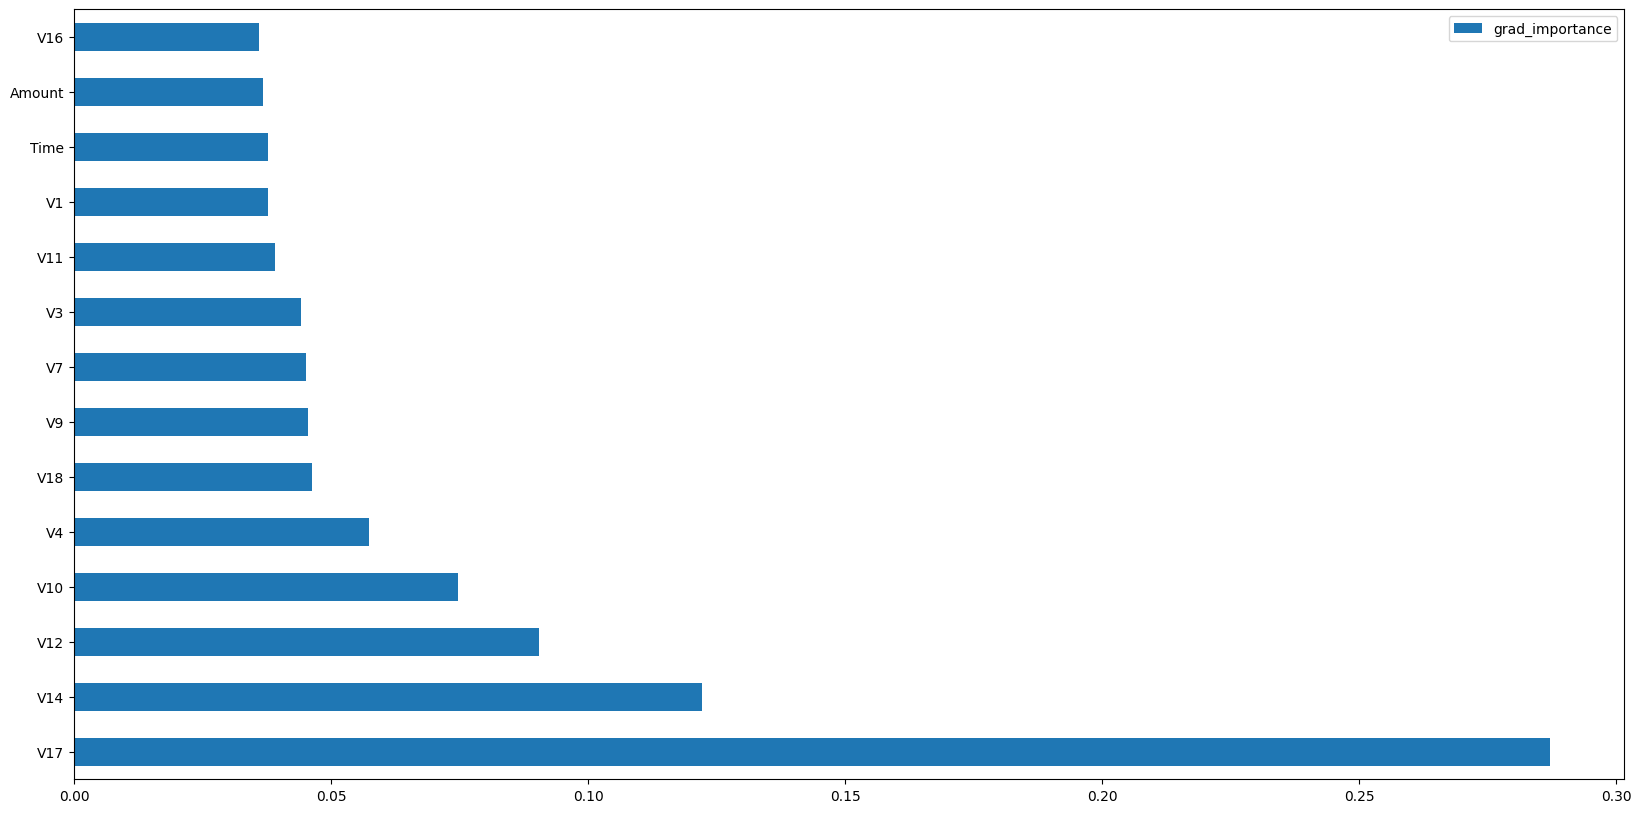

In [107]:
grad_imp_feats.nlargest(40, columns="grad_importance").plot(kind='barh', figsize = (20,10));

In [114]:
# storing top 5 features
top_feat = df[["V17","V14","V12","V10","V4","Class"]]

# splitting X and y
X = top_feat.drop(columns = ['Class'])
y = top_feat['Class']


final_model = XGBClassifier(eta= 0.1, subsample=0.5, 
                           gamma=1, reg_lambda=2, max_dpeth=6)
                           
final_model.fit(X, y)

[09:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_dpeth" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_dpeth=5, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

### Save and Export the Best Model


In [108]:
import pickle

# saving our best performing model 

file = 'final_model.sav'
pickle.dump(final_model, open(file, 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___